In [74]:
from pprint import pprint
import os
import os.path as op
import shutil
import matplotlib.pyplot as plt

# standard third party imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.mode.use_inf_as_na = True

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# standard code-template imports
from ta_lib.core.api import (
    create_context, get_dataframe, get_feature_names_from_column_transformer, get_package_path,
    display_as_tabs, string_cleaning, merge_info, initialize_environment,
    list_datasets, load_dataset, save_dataset
)
import ta_lib.eda.api as eda

In [52]:
initialize_environment(debug=False, hide_warnings=True)

In [53]:
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)
pprint(list_datasets(context))

google_df = load_dataset(context, 'raw/google')
product_df = load_dataset(context, 'raw/product')
sales_df = load_dataset(context, 'raw/sales')
media_df = load_dataset(context, 'raw/media')
theme_list_df = load_dataset(context, 'raw/theme_list')
tpl_df = load_dataset(context, 'raw/tpl')

['/raw/google',
 '/raw/product',
 '/raw/sales',
 '/raw/media',
 '/raw/theme_list',
 '/raw/tpl',
 '/cleaned/google',
 '/cleaned/product',
 '/cleaned/sales',
 '/cleaned/media',
 '/cleaned/theme_list',
 '/cleaned/tpl',
 '/processed/sales',
 '/train/sales/features',
 '/train/sales/target',
 '/test/sales/features',
 '/test/sales/target',
 '/score/sales/output']


In [54]:
str_cols = list(
    set(google_df.select_dtypes('object').columns.to_list())
    - set(['date'])
)

google_df_clean = (
    google_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .to_datetime('date', format='%d-%m-%Y')

    .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
google_df_clean.head()

,date,platform,search_volume,claim_id,week_number,year_new
0,2014-01-05,google,349,916,1,2014
1,2014-01-06,google,349,916,2,2014
2,2014-01-07,google,697,916,2,2014
3,2014-01-10,google,349,916,2,2014
4,2014-01-20,google,697,916,4,2014


In [55]:
str_cols = list(
    set(product_df.select_dtypes('object').columns.to_list())
)

product_df_clean = (
    product_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
product_df_clean.drop(["unnamed_2","unnamed_3","unnamed_4","unnamed_5","unnamed_6"],axis=1,inplace=True)
product_df_clean.head()

,product_id,vendor
0,1,Others
1,2,Others
2,3,Others
3,4,Others
4,5,Others


In [56]:
sales_df['system_calendar_key_N'] = sales_df['system_calendar_key_N'].apply(str)
sales_df_clean = (
    sales_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .to_datetime('system_calendar_key_N', format='%Y%m%d')

    # .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
sales_df_clean.head()

,system_calendar_key_n,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,2016-01-09,1,13927,934,18680
1,2016-01-09,3,10289,1592,28646
2,2016-01-09,4,357,22,440
3,2016-01-09,6,23113,2027,81088
4,2016-01-09,7,23177,3231,58164


In [57]:
media_df['published_date'] = media_df['published_date'].apply(lambda x: x.replace('/','-'))
media_df_clean = (
    media_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .to_datetime('published_date', format='%m-%d-%Y')

    # .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
media_df_clean.head()

,i»¿_theme_id,published_date,total_post
0,148.0,2015-10-01,76
1,148.0,2015-10-10,31
2,148.0,2015-10-11,65
3,148.0,2015-10-12,88
4,148.0,2015-10-13,85


In [58]:
str_cols = list(
    set(theme_list_df.select_dtypes('object').columns.to_list())
)
theme_list_df_clean = (
    theme_list_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    # .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
theme_list_df_clean.head()

,claim_id,claim_name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla


In [59]:
tpl_df_clean = (
    tpl_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    # .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
tpl_df_clean.head()

,product_id,claim_id
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227


In [60]:
save_dataset(context, google_df_clean, 'cleaned/google')
save_dataset(context, product_df_clean, 'cleaned/product')
save_dataset(context, sales_df_clean, 'cleaned/sales')
save_dataset(context, media_df_clean, 'cleaned/media')
save_dataset(context, theme_list_df_clean, 'cleaned/theme_list')
save_dataset(context, tpl_df_clean, 'cleaned/tpl')

In [61]:
lists = theme_list_df_clean.claim_name.unique().tolist()
print(len(lists))
print(lists)

208
['No Claim', 'low carb', 'beans', 'cocoa', 'vanilla', 'stroganoff', 'cumin', 'high/source of protein', 'no additives/preservatives', 'buckwheat', 'tutti frutti', 'ethical - not specific', 'brown ale', 'french bisque', 'pheasant', 'whitebait', 'gmo free', 'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit', 'convenience - easy-to-prepare', 'anchovy', 'pomegranate', 'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar', 'french', 'chicken', 'ethical - packaging', 'cherry', 'vitamin/mineral fortified', 'liver', 'red raspberry', 'cookie', 'pollock', 'blueberry', 'bone health', 'prebiotic', 'poultry', 'cheddar cheese', 'energy/alertness', 'halal', 'herbs', 'pizza', 'american southwest style', 'salmon', 'beef hamburger', 'tilapia', 'mackerel', 'peanut', 'lobster', 'sea salt', 'soy foods', 'apple cinnamon', 'gingerbread', 'vegetarian', 'ethnic & exotic', 'cream', 'berry', 'gluten free', 'added calcium', 'added fiber', 'added iron', 'added protein', 'allergy', 'anti-aging/a

In [62]:
fs_df = pd.merge(sales_df_clean, product_df_clean, on='product_id', how= 'inner')
merge_info(sales_df_clean,product_df_clean, fs_df)

,n_cols,n_rows
left_df,5,1048575
right_df,2,67175
merged_df,6,1048575


In [63]:
fs_df.duplicated().sum()

0

In [64]:
market_share = fs_df.groupby('vendor')['sales_dollars_value'].sum().to_frame()
market_share = market_share*100/market_share.sum()
market_share.reset_index(inplace=True)
market_share.rename(columns = {'sales_dollars_value':'market_share_in_%'}, inplace = True)
market_share

,vendor,market_share_in_%
0,A,32.929503
1,B,16.163885
2,D,12.526006
3,E,1.951810
4,F,5.510681
5,G,1.984330
6,H,2.775353
7,Others,17.072859
8,Private Label,9.085575


In [65]:
theme_df = pd.merge(theme_list_df_clean, tpl_df_clean, on='claim_id', how= 'inner')
merge_info(theme_list_df_clean,tpl_df_clean, theme_df)

,n_cols,n_rows
left_df,2,208
right_df,2,91485
merged_df,3,91485


In [66]:
theme_df.claim_id.nunique()

51

In [67]:
final_sales_df = pd.merge(fs_df, theme_df, on='product_id', how= 'inner')
merge_info(fs_df,theme_df, final_sales_df)

,n_cols,n_rows
left_df,6,1048575
right_df,3,91485
merged_df,8,1726175


In [68]:
set(theme_df.claim_id.unique()) - set(final_sales_df.claim_id.unique())

{59, 65, 148, 157, 211}

In [69]:
theme_df[(theme_df.claim_id == 59) | (theme_df.claim_id == 157)]

,claim_id,claim_name,product_id
62139,59,tutti frutti,5800
62140,59,tutti frutti,5822
62141,59,tutti frutti,5801
62142,59,tutti frutti,5816
62143,59,tutti frutti,5795
62144,59,tutti frutti,5797
62145,59,tutti frutti,5818
62146,59,tutti frutti,5760
62147,59,tutti frutti,5761
62148,59,tutti frutti,5763


In [70]:
potential_competitor = final_sales_df.groupby(['claim_name', 'vendor'])['sales_dollars_value'].sum().reset_index()
potential_competitor.sort_values(by= ['claim_name','sales_dollars_value'], ascending=[True,False],inplace=True)

In [71]:
potential_competitor = potential_competitor.groupby(['claim_name']).head(5)

In [72]:
sum1 = eda.get_variable_summary(potential_competitor)
display_as_tabs([('competitor', sum1)])

Tabs
    [0] DataFrame(name='competitor', value=                          ...)

In [73]:
potential_competitor.vendor.value_counts()

Others           44
A                29
B                23
Private Label    19
F                16
D                14
H                10
Name: vendor, dtype: int64

In [75]:
potential_competitor[potential_competitor.claim_name == 'beans']

,claim_name,vendor,sales_dollars_value
29,beans,Others,34855895
28,beans,D,1775376
27,beans,A,377627
30,beans,Private Label,87473


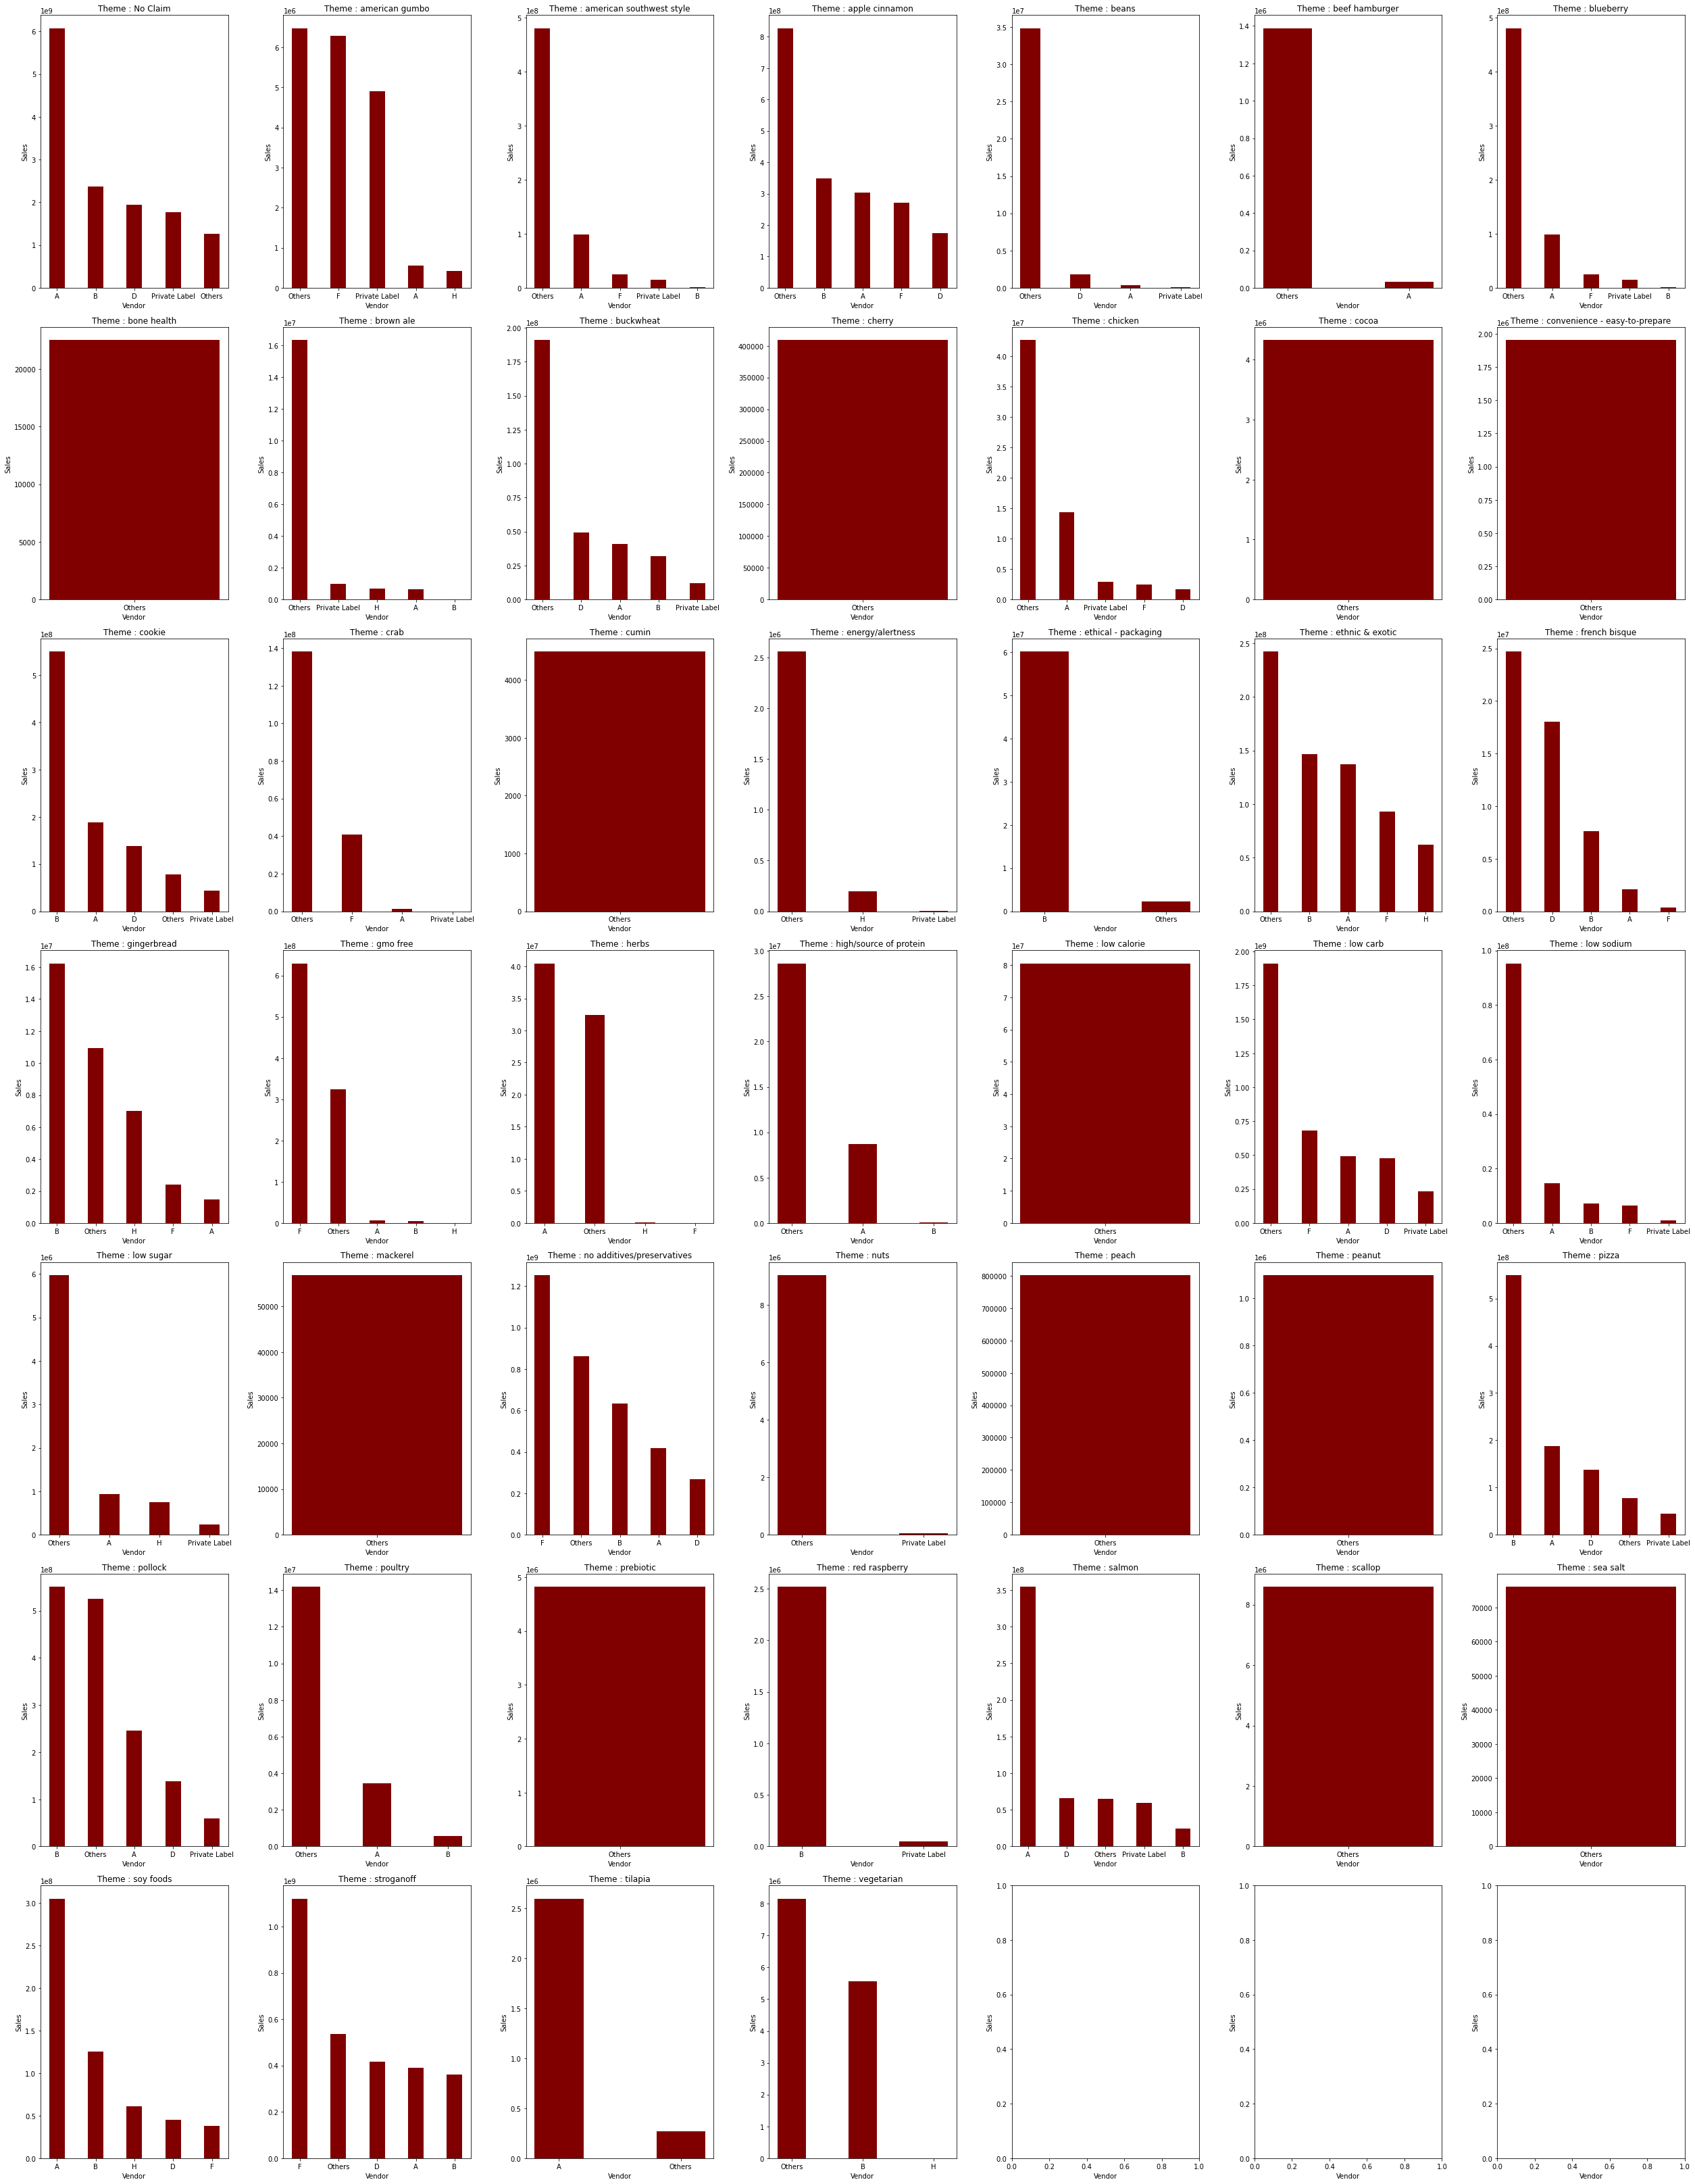

In [76]:
themes = potential_competitor.claim_name.unique().tolist()
fig, axs = plt.subplots(7, 7,figsize=(35,45))
for j,i in enumerate(themes):
    # potential_competitor[potential_competitor.claim_name == i].unstack().plot(kind='bar', figsize = (15,10))
    d = potential_competitor[potential_competitor.claim_name == i]
 
    # creating the bar plot
    m = j//7
    n = j%7
    axs[m,n].bar(d.vendor, d.sales_dollars_value, color ='maroon',
            width = 0.4)
    
#     axs[m,n].xlabel("Vendor")
#     axs[m,n].ylabel("Sales")
    axs[m,n].set_title("Theme : {}".format(i))
#     axs[m,n].show()

for ax in axs.flat:
    ax.set(xlabel='Vendor', ylabel='Sales')

In [77]:
counsumer_preference = final_sales_df.groupby('claim_name')['sales_dollars_value'].sum().to_frame()
counsumer_preference.sort_values(by= ['sales_dollars_value'], ascending=[False],inplace=True)
counsumer_preference.reset_index()

,claim_name,sales_dollars_value
0,No Claim,14717578952
1,low carb,3940640711
2,no additives/preservatives,3479291138
3,stroganoff,2974895352
4,apple cinnamon,2099840865
5,pollock,1555418578
6,cookie,1008292754
7,pizza,1008292754
8,gmo free,966107988
9,ethnic & exotic,706459484


In [79]:
# first time customer
cust_details = sales_df.groupby(['customername']).agg({'ledger_date':'min'}).reset_index()
cust_details.columns = ['customername','ledger_date']
cust_details['first_time_customer'] = 1
sales_df = sales_df.merge(cust_details, on=['customername','ledger_date'], how='left')
sales_df['first_time_customer'].fillna(0, inplace=True)

KeyError: 'customername'